In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np
import heapq
import time

csv_file = 'datarute.csv'
df = pd.read_csv(csv_file, index_col=0).replace(' ', 0).astype(int)

bus_routes_data = {
    'FD01': ['Sindoro', 'SMPN 3', 'Siola', 'Tunjungan', 'Embong Malang', 'Embong Malang 2', 'Kedungdoro', 'Wonorejo', 'Kupang Krajan', 'Pasar Kembang', 'Buntulan'],
    'FD07': [
        'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'SMPN 3',
        'Blauran', 'Pirngadi', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni',
        'Balai Kota', 'Slamet', 'Sumatera', 'Ruko Gubeng', 'Taman Lansia', 'Biliton 1', 'Biliton 2',
        'BTPN Kertajaya', 'Kertjaya Masjid A', 'Kertajaya', 'Manyar Sabranga', 'Manyar Dukuh',
        'Manyar Airdas', 'Menur A', 'Kalibokor Selatan', 'Ngagel Jaya Utara', 'Ngagel Jaya Tengah',
        'Maybank Brantang Binangun', 'Sulawesi', 'Flores', 'Sumbawa', 'Raya Gubeng', 'Monkasel',
        'Pemuda', 'Yos Sudarso', 'Monumen Jenderal Sudirman', 'Taman Prestasi', 'Gondosuli',
        'Kantor Dinas Pendidikan', 'RSI A.yani', 'KBS', 'Marmoyo', 'Darmokali 1', 'Darmokali 2',
        'Progo', 'Ngagel', 'Ngagel 1b', 'Novotel', 'SPBU Ngagel', 'SPN Ngagel', 'Marvel', 'Bung Tomo',
        'TMP Ngagel', 'Ngagel Jaya Barat', 'Ngagel Jaya Selatan', 'Krukah Timur', 'Ngagel Madya',
        'Upajiwa', 'Ratna', 'Ubaya Ngagel', 'Stasiun Wonokromo'],
    'FD03': ['RSI A.yani', 'KBS', 'Marmoyo', 'Darmokali 1', 'Darmokali 2', 'Progo', 'Ngagel', 'Ngagel 1b', 'Novotel', 'SPBU Ngagel', 'SPN Ngagel', 'Marvel', 'Bung Tomo', 'TMP Ngagel', 'Ngagel Jaya Barat', 'Ngagel Jaya Selatan', 'Krukah Timur', 'Ngagel Madya', 'Maybank Brantang Binangun', 'Upajiwa', 'Ratna', 'Stasiun Wonokromo', 'Ubaya Ngagel'],
    'FD02': ['Monkasel', 'Kayoon 2', 'Kayoon 1', 'Embong Kemiri', 'Bambu Runcing', 'PMI', 'Sono Kembang'],
    'FD06': ['Pasar Ikan', 'Gajah Mada', 'Rusun Gunung Sari', 'Taman Ronggowale', 'Waringin', 'RSI A.yani', 'KBS']
}

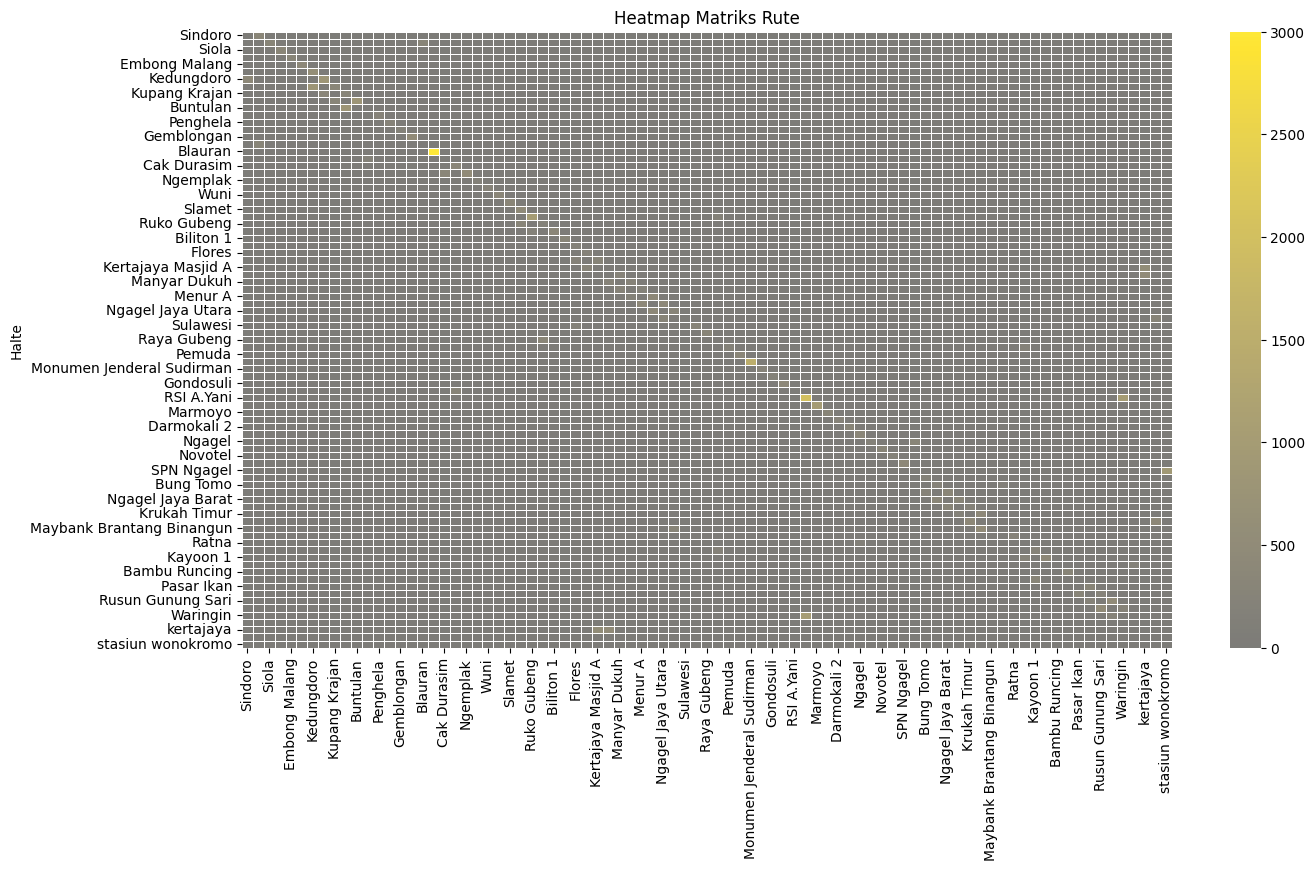

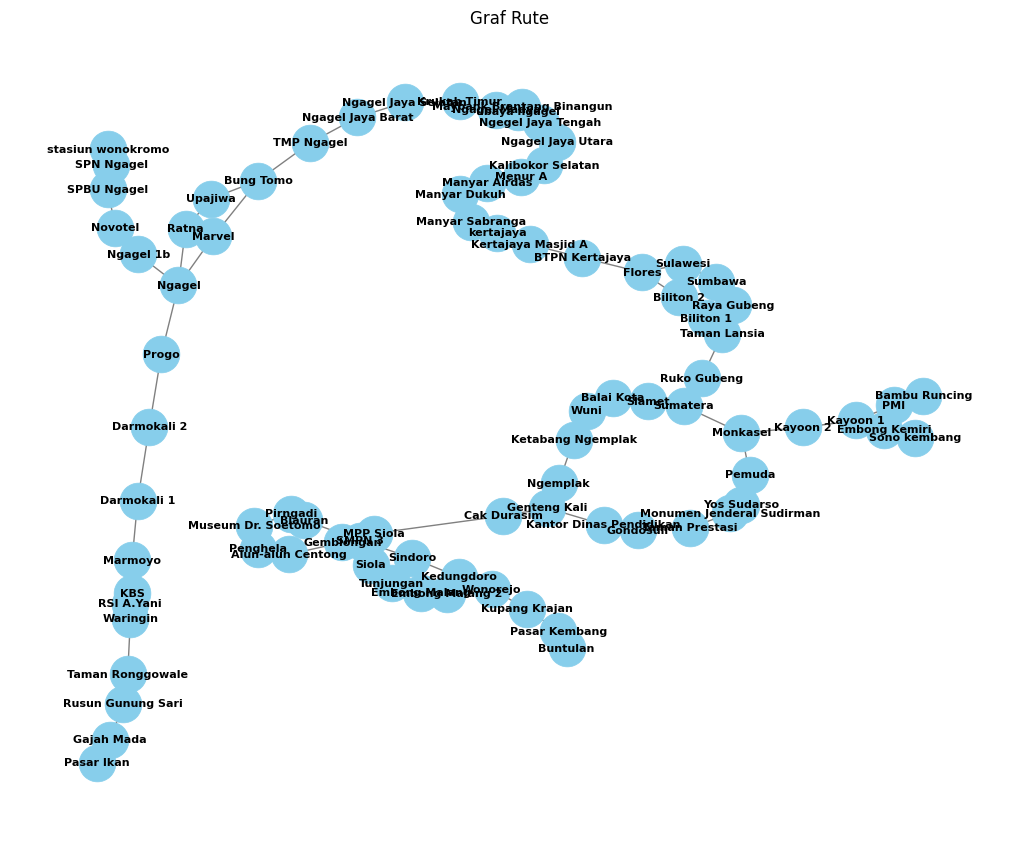

In [4]:
plt.figure(figsize=(15, 8))
sns.heatmap(df, linewidths=.5, cmap='cividis', center=0)
plt.title('Heatmap Matriks Rute')
plt.show()

graph = nx.from_pandas_adjacency(df)
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(graph)
nx.draw(graph, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="gray", linewidths=0.5)
plt.title('Graf Rute')
plt.show()


In [4]:
def create_graph(matrix):
    graph = {}
    nodes = matrix.index.tolist()

    for node in nodes:
        neighbors = {}
        for neighbor, weight in zip(matrix.columns, matrix.loc[node]):
            if weight > 0:
                neighbors[neighbor] = weight
        graph[node] = neighbors

    return graph

Jarak terpendek dari Wonorejo ke Wuni: 7570m
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Kode bus dari Wonorejo ke Kedungdoro: ['FD01']
Kode bus dari Kedungdoro ke Sindoro: ['FD01']
Kode bus dari Sindoro ke SMPN 3: ['FD01']
Kode bus dari SMPN 3 ke Blauran: ['FD07']
Kode bus dari Blauran ke Pirngadi: ['FD07']
Kode bus dari Pirngadi ke Museum Dr. Soetomo: ['FD07']
Kode bus dari Museum Dr. Soetomo ke Penghela: ['FD07']
Kode bus dari Penghela ke Alun-alun Centong: ['FD07']
Kode bus dari Alun-alun Centong ke Gemblongan: ['FD07']
Kode bus dari Gemblongan ke MPP Siola: ['FD07']
Kode bus dari MPP Siola ke Cak Durasim: ['FD07']
Kode bus dari Cak Durasim ke Genteng Kali: ['FD07']
Kode bus dari Genteng Kali ke Ngemplak: ['FD07']
Kode bus dari Ngemplak ke Ketabang Ngemplak: ['FD07']
Kode bus dari Ketaba

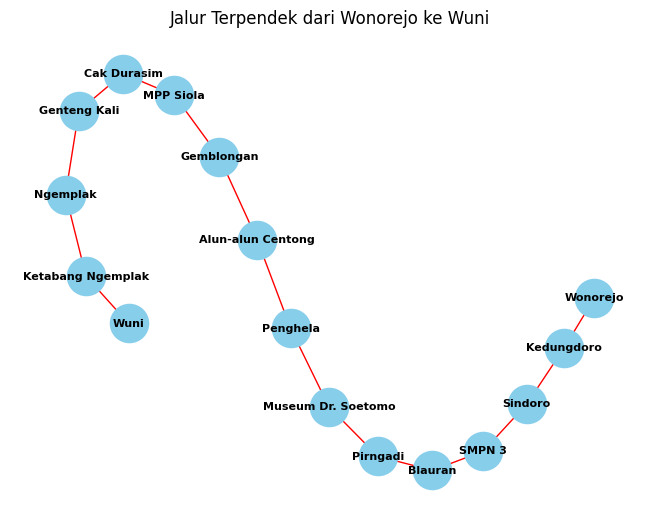

In [ ]:
def dijkstra(graph, start, end, bus_routes_df):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = set(graph)
    previous_nodes = {node: None for node in graph}
    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node
    if distances[end] == float('infinity'):
        return None, None
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return distances[end], path

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()
    kode_bus = []
    for column in bus_routes_df.columns:
        if halte_name in bus_routes_df[column].str.lower().values:
            kode_bus.append(column)
    return kode_bus

def find_combined_bus_code(bus_routes_df, start_node, end_node):
    start_kode_bus = find_bus_code(bus_routes_df, start_node)
    end_kode_bus = find_bus_code(bus_routes_df, end_node)
    combined_kode_bus = list(set(start_kode_bus) & set(end_kode_bus))
    return combined_kode_bus

def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None
    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code
    if current_code is not None:
        simplified_codes.append(current_code)
    return simplified_codes

graph = create_graph(df)
max_len = max(map(len, bus_routes_data.values()))
bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = dijkstra(graph, start_node, end_node, bus_routes_df)
print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}m")
print(f"Jalur terpendek: {shortest_path}")

for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]
    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    simplified_codes = simplify_bus_codes(combined_kode_bus)
    print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")

full_route_bus_codes = []

for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]
    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    full_route_bus_codes.extend(combined_kode_bus)

simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")

G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])
G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)
plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


Jarak terpendek dari Wonorejo ke Wuni: 7570m
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Kode bus dari Wonorejo ke Kedungdoro: ['FD01']
Kode bus dari Kedungdoro ke Sindoro: ['FD01']
Kode bus dari Sindoro ke SMPN 3: ['FD01']
Kode bus dari SMPN 3 ke Blauran: ['FD07']
Kode bus dari Blauran ke Pirngadi: ['FD07']
Kode bus dari Pirngadi ke Museum Dr. Soetomo: ['FD07']
Kode bus dari Museum Dr. Soetomo ke Penghela: ['FD07']
Kode bus dari Penghela ke Alun-alun Centong: ['FD07']
Kode bus dari Alun-alun Centong ke Gemblongan: ['FD07']
Kode bus dari Gemblongan ke MPP Siola: ['FD07']
Kode bus dari MPP Siola ke Cak Durasim: ['FD07']
Kode bus dari Cak Durasim ke Genteng Kali: ['FD07']
Kode bus dari Genteng Kali ke Ngemplak: ['FD07']
Kode bus dari Ngemplak ke Ketabang Ngemplak: ['FD07']
Kode bus dari Ketaba

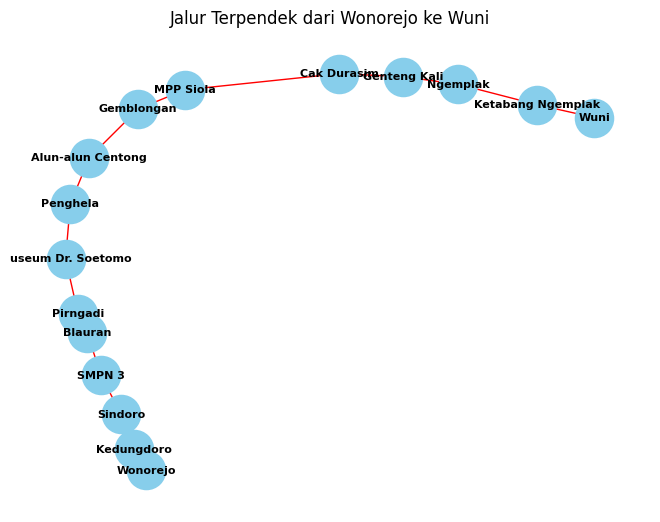

In [ ]:
def bellman_ford(graph, start, end, bus_routes_df):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    for _ in range(len(graph) - 1):
        for current_node in graph:
            for neighbor, weight in graph[current_node].items():
                potential_route = distances[current_node] + weight
                if potential_route < distances[neighbor]:
                    distances[neighbor] = potential_route
                    previous_nodes[neighbor] = current_node
    negative_cycle = False
    for current_node in graph:
        for neighbor, weight in graph[current_node].items():
            if distances[current_node] + weight < distances[neighbor]:
                negative_cycle = True
    if negative_cycle:
        raise ValueError("Graph contains a negative cycle")
    if distances[end] == float('infinity'):
        return None, None
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return distances[end], path

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()
    kode_bus = []
    for column in bus_routes_df.columns:
        if halte_name in bus_routes_df[column].str.lower().values:
            kode_bus.append(column)
    return kode_bus

def find_combined_bus_code(bus_routes_df, start_node, end_node):
    start_kode_bus = find_bus_code(bus_routes_df, start_node)
    end_kode_bus = find_bus_code(bus_routes_df, end_node)
    combined_kode_bus = list(set(start_kode_bus) & set(end_kode_bus))
    return combined_kode_bus

def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None
    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code
    if current_code is not None:
        simplified_codes.append(current_code)
    return simplified_codes

graph = create_graph(df)
max_len = max(map(len, bus_routes_data.values()))
bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path = bellman_ford(graph, start_node, end_node, bus_routes_df)
print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}m")
print(f"Jalur terpendek: {shortest_path}")

for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]
    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    simplified_codes = simplify_bus_codes(combined_kode_bus)
    print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")

full_route_bus_codes = []
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]
    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    full_route_bus_codes.extend(combined_kode_bus)

simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")

G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)
plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


Jarak terpendek dari Wonorejo ke Wuni: 7570m
Jalur terpendek: ['Wonorejo', 'Kedungdoro', 'Sindoro', 'SMPN 3', 'Blauran', 'Pirngadi', 'Museum Dr. Soetomo', 'Penghela', 'Alun-alun Centong', 'Gemblongan', 'MPP Siola', 'Cak Durasim', 'Genteng Kali', 'Ngemplak', 'Ketabang Ngemplak', 'Wuni']
Kode bus dari Wonorejo ke Kedungdoro: ['FD01']
Kode bus dari Kedungdoro ke Sindoro: ['FD01']
Kode bus dari Sindoro ke SMPN 3: ['FD01']
Kode bus dari SMPN 3 ke Blauran: ['FD07']
Kode bus dari Blauran ke Pirngadi: ['FD07']
Kode bus dari Pirngadi ke Museum Dr. Soetomo: ['FD07']
Kode bus dari Museum Dr. Soetomo ke Penghela: ['FD07']
Kode bus dari Penghela ke Alun-alun Centong: ['FD07']
Kode bus dari Alun-alun Centong ke Gemblongan: ['FD07']
Kode bus dari Gemblongan ke MPP Siola: ['FD07']
Kode bus dari MPP Siola ke Cak Durasim: ['FD07']
Kode bus dari Cak Durasim ke Genteng Kali: ['FD07']
Kode bus dari Genteng Kali ke Ngemplak: ['FD07']
Kode bus dari Ngemplak ke Ketabang Ngemplak: ['FD07']
Kode bus dari Ketaba

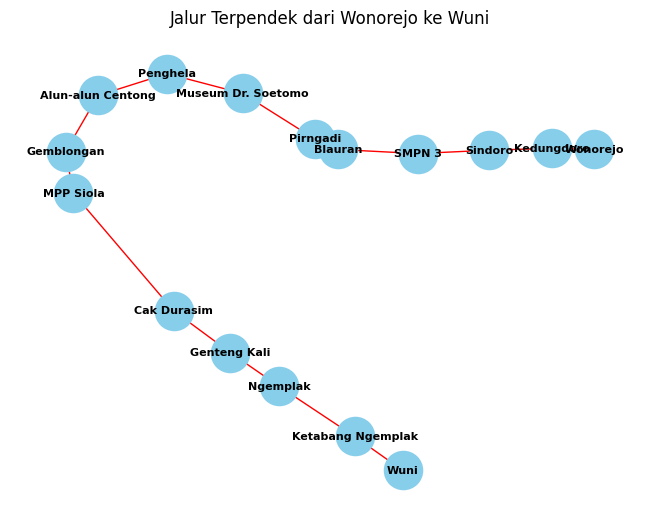

In [ ]:
def a_star(graph, start, end, bus_routes_df):
    open_set = []
    heapq.heappush(open_set, (0, start, [], []))  # Priority queue with initial cost, node, path, and bus route
    closed_set = set()
    while open_set:
        current_cost, current_node, current_path, current_route = heapq.heappop(open_set)
        if current_node == end:
            return current_cost, current_path + [end], current_route
        if current_node in closed_set:
            continue
        closed_set.add(current_node)
        for neighbor, weight in graph[current_node].items():
            if neighbor not in closed_set:
                heuristic_cost = estimate_cost(graph, neighbor, end)
                total_cost = current_cost + weight + heuristic_cost
                current_segment_route = find_combined_bus_code(bus_routes_df, current_node, neighbor)
                heapq.heappush(open_set, (total_cost, neighbor, current_path + [current_node], current_route + [current_segment_route]))
    raise ValueError("No path found")

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()
    kode_bus = []
    for column in bus_routes_df.columns:
        bus_codes = [code for code in bus_routes_df[column].dropna().str.lower().tolist() if halte_name in code]
        kode_bus.extend(bus_codes)
    return kode_bus

def simplify_bus_codes(route_bus_codes):
    simplified_codes = []
    current_code = None
    for code in route_bus_codes:
        if current_code is None or code == current_code:
            current_code = code
        else:
            simplified_codes.append(current_code)
            current_code = code
    if current_code is not None:
        simplified_codes.append(current_code)
    return simplified_codes

bus_routes_df = pd.DataFrame({k: v + [np.nan] * (max_len - len(v)) for k, v in bus_routes_data.items()})
start_node = 'Wonorejo'
end_node = 'Wuni'
distance, shortest_path, bus_route = a_star(graph, start_node, end_node, bus_routes_df)

print(f"Jarak terpendek dari {start_node} ke {end_node}: {distance}m")
print(f"Jalur terpendek: {shortest_path}")

def find_bus_code(bus_routes_df, halte_name):
    halte_name = halte_name.lower()
    kode_bus = []
    for column in bus_routes_df.columns:
        if bus_routes_df[column].str.lower().eq(halte_name).any():
            kode_bus.append(column)
    return kode_bus

for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]
    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    simplified_codes = simplify_bus_codes(combined_kode_bus)
    print(f"Kode bus dari {current_node} ke {next_node}: {simplified_codes}")

full_route_bus_codes = []
for i in range(len(shortest_path) - 1):
    current_node = shortest_path[i]
    next_node = shortest_path[i + 1]
    combined_kode_bus = find_combined_bus_code(bus_routes_df, current_node, next_node)
    full_route_bus_codes.extend(combined_kode_bus)

simplified_full_route_bus_codes = simplify_bus_codes(full_route_bus_codes)
print(f"Kode bus untuk seluruh jalur terpendek: {' transit ke '.join(simplified_full_route_bus_codes)}")

G = nx.Graph()
for i in range(len(shortest_path)-1):
    G.add_edge(shortest_path[i], shortest_path[i+1], weight=graph[shortest_path[i]][shortest_path[i+1]])
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=8, font_color="black", font_weight="bold", edge_color="red", linewidths=2)
plt.title('Jalur Terpendek dari {} ke {}'.format(start_node, end_node))
plt.show()


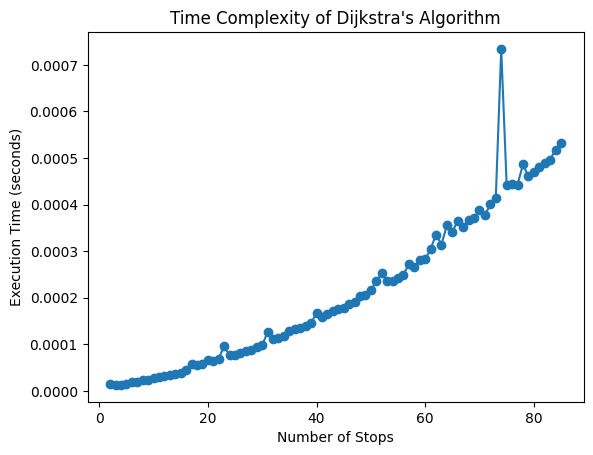

In [ ]:
import time

def dijkstra(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    unvisited_nodes = set(graph)
    while unvisited_nodes:
        current_node = min(unvisited_nodes, key=lambda node: distances[node])
        unvisited_nodes.remove(current_node)
        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                previous_nodes[neighbor] = current_node
    return distances, previous_nodes

def get_shortest_path(previous_nodes, end):
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return path

def measure_execution_time(graph, start_node, end_node):
    start_time = time.time()
    distance, previous_nodes = dijkstra(graph, start_node)
    end_time = time.time()
    return end_time - start_time

execution_times = []

for i in range(2, len(df) + 1):
    subgraph = df.iloc[:i, :i]
    graph = create_graph(subgraph)
    start_node = subgraph.index[0]
    end_node = subgraph.index[-1]
    execution_time = measure_execution_time(graph, start_node, end_node)
    execution_times.append(execution_time)

plt.plot(range(2, len(df) + 1), execution_times, marker='o')
plt.xlabel('Number of Stops')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity of Dijkstra\'s Algorithm')
plt.show()


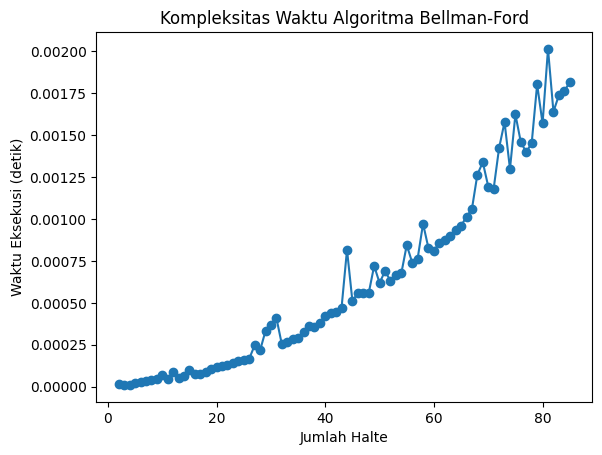

In [5]:
import time

def bellman_ford(graph, start):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    previous_nodes = {node: None for node in graph}
    nodes = list(graph.keys())
    edges = [(u, v) for u in nodes for v in graph[u]]
    for _ in range(len(nodes) - 1):
        for u, v in edges:
            if distances[u] + graph[u][v] < distances[v]:
                distances[v] = distances[u] + graph[u][v]
                previous_nodes[v] = u
    for u, v in edges:
        if distances[u] + graph[u][v] < distances[v]:
            raise ValueError("Graf berisi siklus negatif")
    return distances, previous_nodes

def get_shortest_path(previous_nodes, end):
    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]
    return path

def measure_execution_time(graph, start_node, end_node):
    start_time = time.time()
    distance, previous_nodes = bellman_ford(graph, start_node)
    end_time = time.time()
    return end_time - start_time

execution_times = []

for i in range(2, len(df) + 1):
    subgraph = df.iloc[:i, :i]
    graph = create_graph(subgraph)
    start_node = subgraph.index[0]
    end_node = subgraph.index[-1]
    execution_time = measure_execution_time(graph, start_node, end_node)
    execution_times.append(execution_time)

# Menampilkan grafik kompleksitas waktu
plt.plot(range(2, len(df) + 1), execution_times, marker='o')
plt.xlabel('Jumlah Halte')
plt.ylabel('Waktu Eksekusi (detik)')
plt.title('Kompleksitas Waktu Algoritma Bellman-Ford')
plt.show()


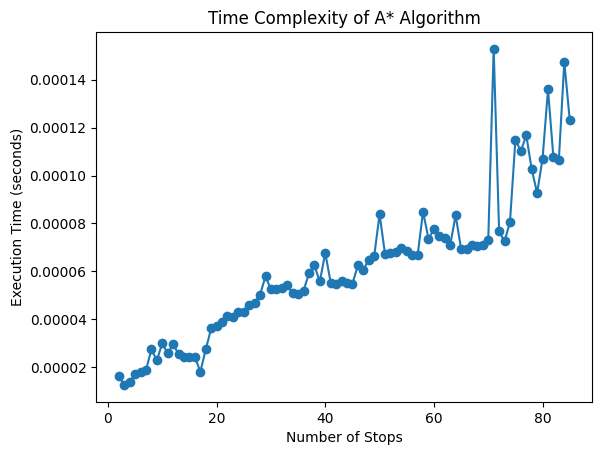

In [20]:


def heuristic(node, goal):
    return 0

def astar(graph, start, end):
    distances = {node: float('infinity') for node in graph}
    distances[start] = 0
    unvisited_nodes = [(0, start)]
    previous_nodes = {node: None for node in graph}

    while unvisited_nodes:
        current_distance, current_node = heapq.heappop(unvisited_nodes)

        if current_node == end:
            break

        for neighbor, weight in graph[current_node].items():
            potential_route = distances[current_node] + weight
            if potential_route < distances[neighbor]:
                distances[neighbor] = potential_route
                priority = potential_route + heuristic(neighbor, end)
                heapq.heappush(unvisited_nodes, (priority, neighbor))
                previous_nodes[neighbor] = current_node

    path = []
    current = end
    while current is not None:
        path.insert(0, current)
        current = previous_nodes[current]

    return distances[end], path

def measure_execution_time(graph, start_node, end_node):
    start_time = time.time()
    distance, path = astar(graph, start_node, end_node)
    end_time = time.time()

    return end_time - start_time

execution_times = []

for i in range(2, len(df) + 1):
    subgraph = df.iloc[:i, :i]
    graph = create_graph(subgraph)

    start_node = subgraph.index[0]
    end_node = subgraph.index[-1]
    execution_time = measure_execution_time(graph, start_node, end_node)

    execution_times.append(execution_time)

plt.plot(range(2, len(df) + 1), execution_times, marker='o')
plt.xlabel('Number of Stops')
plt.ylabel('Execution Time (seconds)')
plt.title('Time Complexity of A* Algorithm')
plt.show()